In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from linear_regression import LinearRegression
import scipy.stats as stats

In [23]:
df = pd.read_csv("dataset.csv", delimiter=";")
X = df["Angle"]
y = df["Distance"]

Text(0, 0.5, 'Distance')

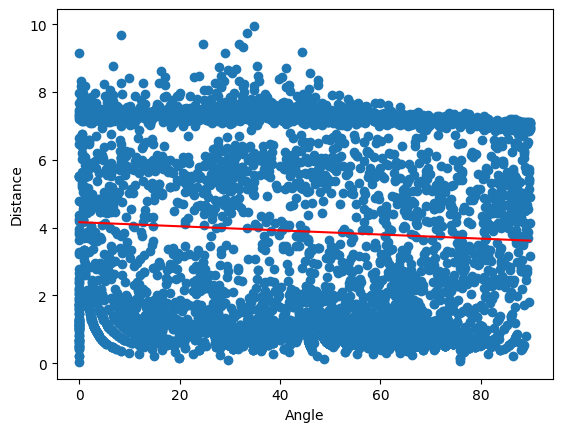

In [24]:
lr = LinearRegression()
lr.build(X, y)
b = lr.betas
plt.scatter(X, y)
space = np.linspace(np.min(X), np.max(X))
Y = b[0]*space + b[1]
plt.plot(space, Y, color="r")
plt.xlabel("Angle")
plt.ylabel("Distance")

# QUANTILE RESIDUALS

((array([-3.63692208, -3.40167743, -3.27202625, ...,  3.27202625,
          3.40167743,  3.63692208]),
  array([-1.49002939, -1.43218204, -1.43218204, ...,  2.00979246,
          2.08654492,  2.16910741])),
 (0.9208885491939715, 5.014128764360999e-16, 0.9202767920847318))

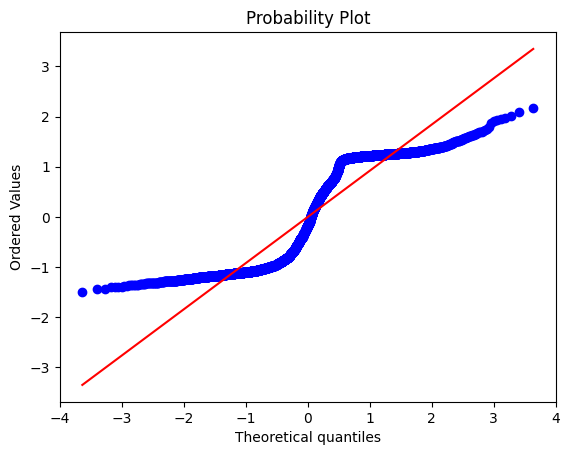

In [53]:
predictions = lr.predict(X)
residuals = y - predictions
s = np.std(residuals)

quantile_residuals = residuals/s
fig, ax = plt.subplots()
stats.probplot(quantile_residuals, plot=ax)

# Implementing Cook's distance from the workbook (not the weirdly written chapter 8)

In [ ]:
k = len(predictions)
MSE = np.sum(residuals**2)/k
h = np.diag(lr.hat_matrix)
D = (residuals**2 / (2*(MSE))) * (h / ((1 - h))**2)
print(D[0])
plt.bar(range(k), D)
#I think this is very wrong

IndexError: tuple index out of range